In [1]:
# import sys
# sys.path.append('/mnt/disk1/yunseob/Pytorch/1_CapsuleEndo/')
from CE_utils import sm160_dataset, GenerateLabel
from CE_training import CNN_Training

import numpy as np
from itertools import product

In [2]:
def sm160_load(tv_rate = 0.9):
    neg_train_aug_path, neg_train_x, neg_valid_x = sm160.Get_train_valid_set('n', 'neg', train_rate = tv_rate)
    redspot_train_aug_path, redspot_train_x, redspot_valid_x = sm160.Get_train_valid_set('h', 'redspot', train_rate = tv_rate)
    angio_train_aug_path, angio_train_x, angio_valid_x = sm160.Get_train_valid_set('h', 'angio', train_rate = tv_rate)
    active_train_aug_path, active_train_x, active_valid_x = sm160.Get_train_valid_set('h', 'active', train_rate = tv_rate)
    ero_train_aug_path, ero_train_x, ero_valid_x = sm160.Get_train_valid_set('d', 'ero', train_rate = tv_rate)
    ulcer_train_aug_path, ulcer_train_x, ulcer_valid_x = sm160.Get_train_valid_set('d', 'ulcer', train_rate = tv_rate)
    str_train_aug_path, str_train_x, str_valid_x = sm160.Get_train_valid_set('d', 'str', train_rate = tv_rate)

    # 실제 모델이 학습할 augmented training data의 경로를 클래스 기준에 따라 list로 정리  
    h_train_aug_path = np.hstack([redspot_train_aug_path, angio_train_aug_path, active_train_aug_path])
    d_train_aug_path = np.hstack([ero_train_aug_path, ulcer_train_aug_path, str_train_aug_path])
    a_train_aug_path = np.hstack([h_train_aug_path, d_train_aug_path])
    train_paths = [neg_train_aug_path, a_train_aug_path]

    # epcch마다 모델을 평가할 (not augmented) training set과 validation set 클래스 기준에 따라 정리
    h_train_X = np.vstack([redspot_train_x, angio_train_x, active_train_x])
    d_train_X = np.vstack([ero_train_x, ulcer_train_x, str_train_x])
    a_train_X = np.vstack([h_train_X, d_train_X])

    h_valid_X = np.vstack([redspot_valid_x, angio_valid_x, active_valid_x])
    d_valid_X = np.vstack([ero_valid_x, ulcer_valid_x, str_valid_x])
    a_valid_X = np.vstack([h_valid_X, d_valid_X])

    train_X = [neg_train_x, a_train_X]
    valid_X = [neg_valid_x, a_valid_X]
    
    return train_paths, train_X, valid_X

negative - negative | augmented training data: 5619 |(For validation) train x: (5619, 3, 512, 512) valid x: (625, 3, 512, 512)
hemorrhagic - red_spot | augmented training data: 500 |(For validation) train x: (500, 3, 512, 512) valid x: (56, 3, 512, 512)
hemorrhagic - angioectasia | augmented training data: 16 |(For validation) train x: (16, 3, 512, 512) valid x: (2, 3, 512, 512)
hemorrhagic - active_bleeding | augmented training data: 385 |(For validation) train x: (385, 3, 512, 512) valid x: (43, 3, 512, 512)
depressed - erosion | augmented training data: 663 |(For validation) train x: (663, 3, 512, 512) valid x: (74, 3, 512, 512)
depressed - ulcer | augmented training data: 658 |(For validation) train x: (658, 3, 512, 512) valid x: (74, 3, 512, 512)
depressed - stricture | augmented training data: 92 |(For validation) train x: (92, 3, 512, 512) valid x: (11, 3, 512, 512)

Phase: ---, Learning Rate: 1e-05, Batch Size: 32

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmen

/home/yunseob/Pytorch/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


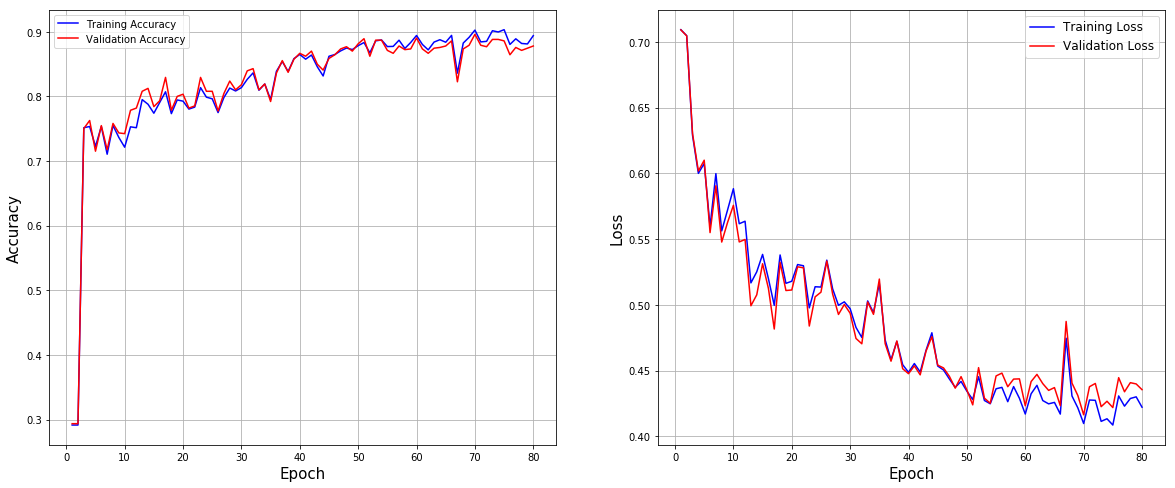

Best Model: B_---_1e-05_32_2007141647_070_t_accr_0.9026_t_loss_0.409684_v_accr_0.8960_v_loss_0.416311.pt

Phase: ---, Learning Rate: 1e-05, Batch Size: 16

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 5619
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 2314

Device: GeForce RTX 2080 Ti 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 512, 512]             448
            Conv2d-2         [-1, 16, 512, 512]           2,320
         MaxPool2d-3         [-1, 16, 256, 256]               0
            Conv2d-4         [-1, 16, 256, 256]           2,320
            Conv2d-5         [-1, 16, 256, 256]           2,320
         MaxPool2d-6         [-1, 16, 128, 128]               0
            Conv2d-7         [-1, 16, 128, 128]           2,320
            Conv2d-8         [-1, 16, 128, 128]           2,320
         MaxPool

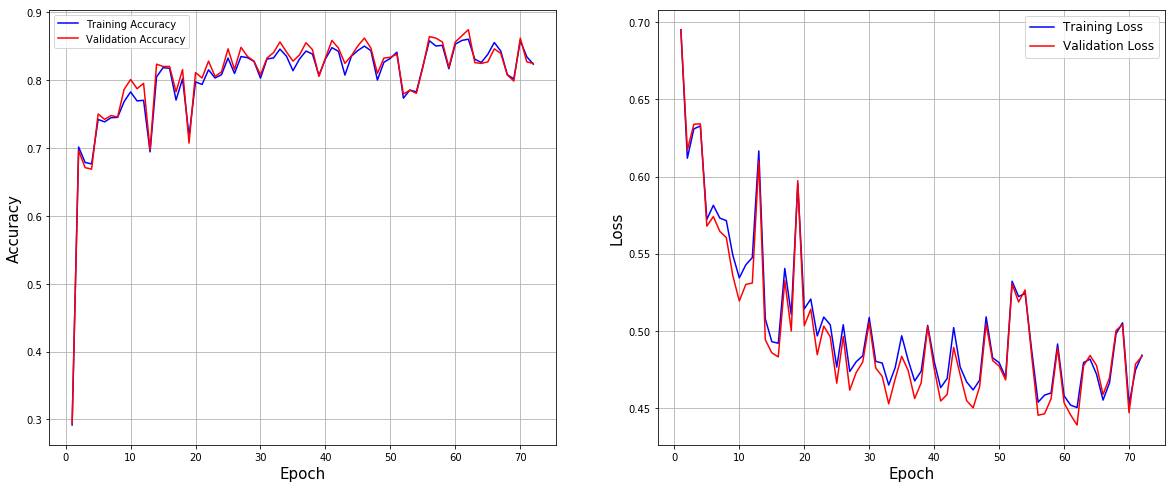

Best Model: B_---_1e-05_32_2007141647_070_t_accr_0.9026_t_loss_0.409684_v_accr_0.8960_v_loss_0.416311.pt

Phase: ---, Learning Rate: 1e-05, Batch Size: 8

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 5619
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 2314

Device: GeForce RTX 2080 Ti 

Epoch |#########################################################------------- | 81 / 100

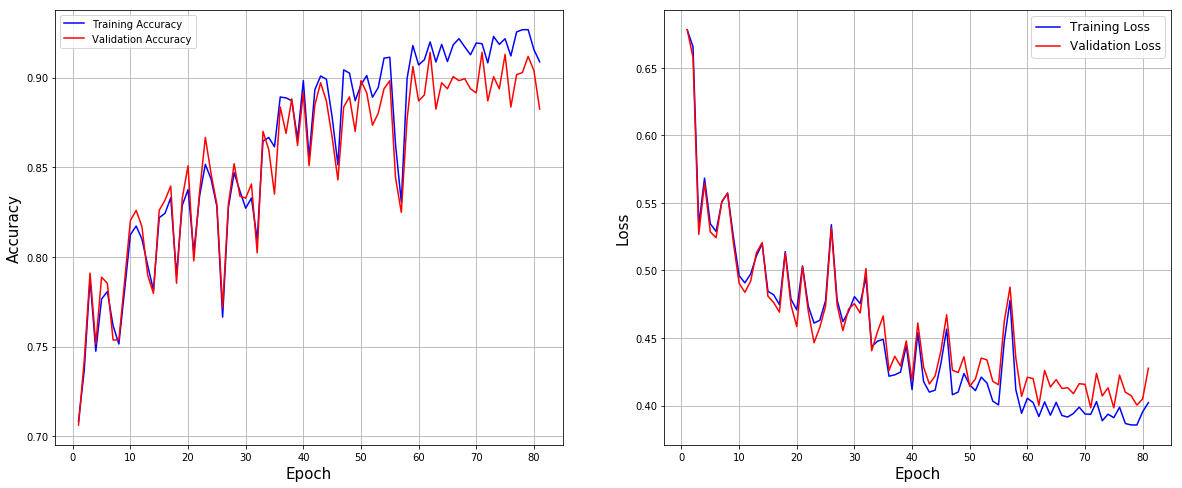

Best Model: B_---_1e-05_8_2007141934_062_t_accr_0.9200_t_loss_0.391860_v_accr_0.9141_v_loss_0.400166.pt

Phase: ---, Learning Rate: 0.0001, Batch Size: 32

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 5619
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 2314

Device: GeForce RTX 2080 Ti 

Epoch |#################################################--------------------- | 70 / 100

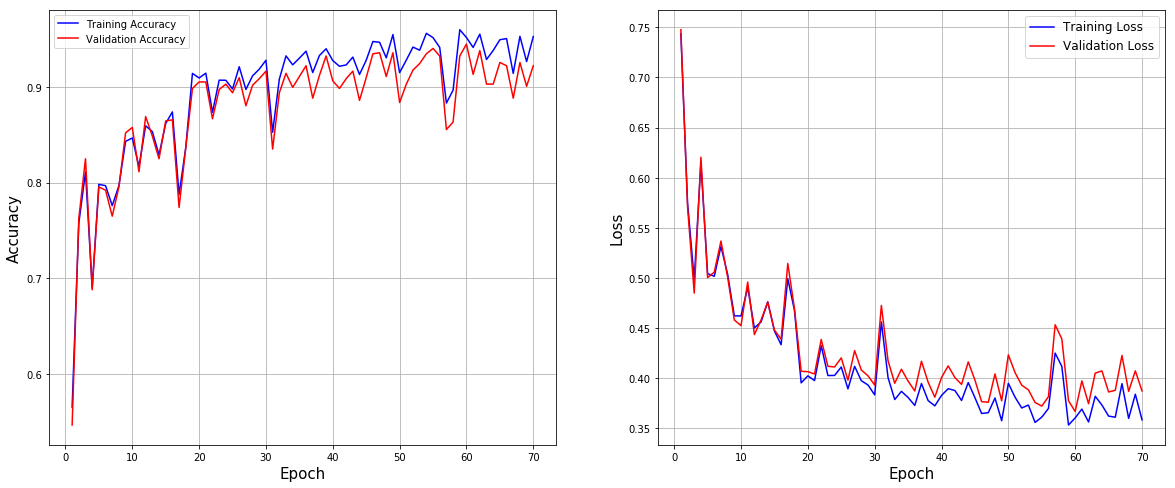

Best Model: B_---_0.0001_32_2007142105_060_t_accr_0.9515_t_loss_0.360465_v_accr_0.9446_v_loss_0.366831.pt

Phase: ---, Learning Rate: 0.0001, Batch Size: 16

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 5619
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 2314

Device: GeForce RTX 2080 Ti 

Epoch |#######################################################--------------- | 79 / 100

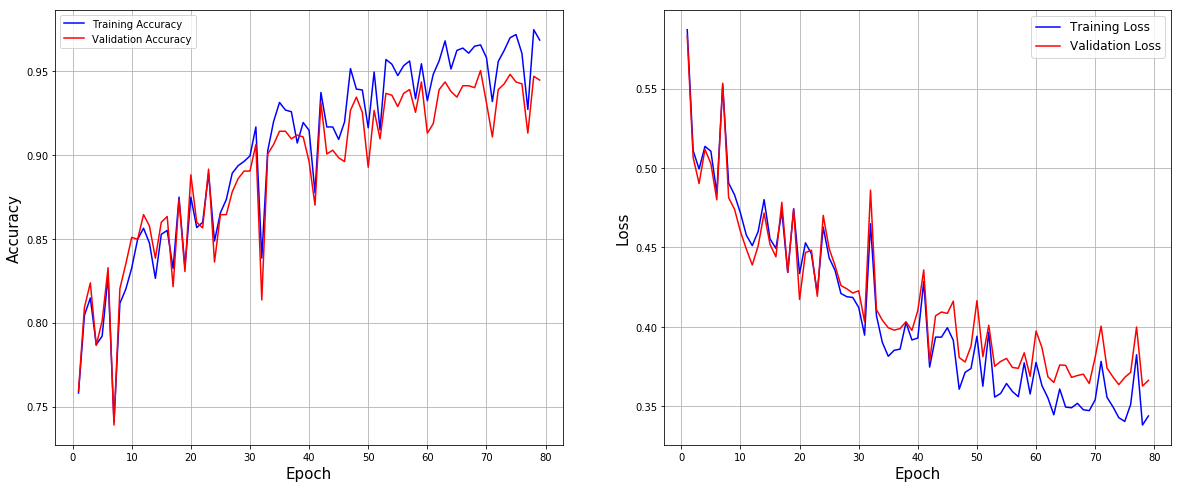

Best Model: B_---_0.0001_16_2007142232_069_t_accr_0.9656_t_loss_0.347245_v_accr_0.9503_v_loss_0.364293.pt

Phase: ---, Learning Rate: 0.0001, Batch Size: 8

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 5619
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 2314

Device: GeForce RTX 2080 Ti 

Epoch |#################################------------------------------------- | 47 / 100

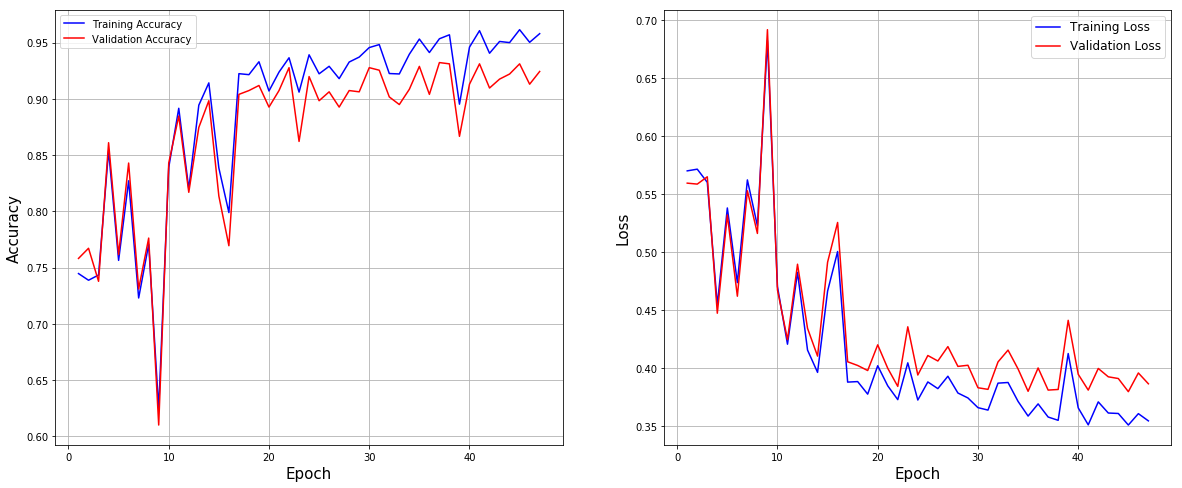

Best Model: B_---_0.0001_16_2007142232_069_t_accr_0.9656_t_loss_0.347245_v_accr_0.9503_v_loss_0.364293.pt

Phase: ---, Learning Rate: 0.001, Batch Size: 32

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 5619
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 2314

Device: GeForce RTX 2080 Ti 

Epoch |####################################################------------------ | 74 / 100

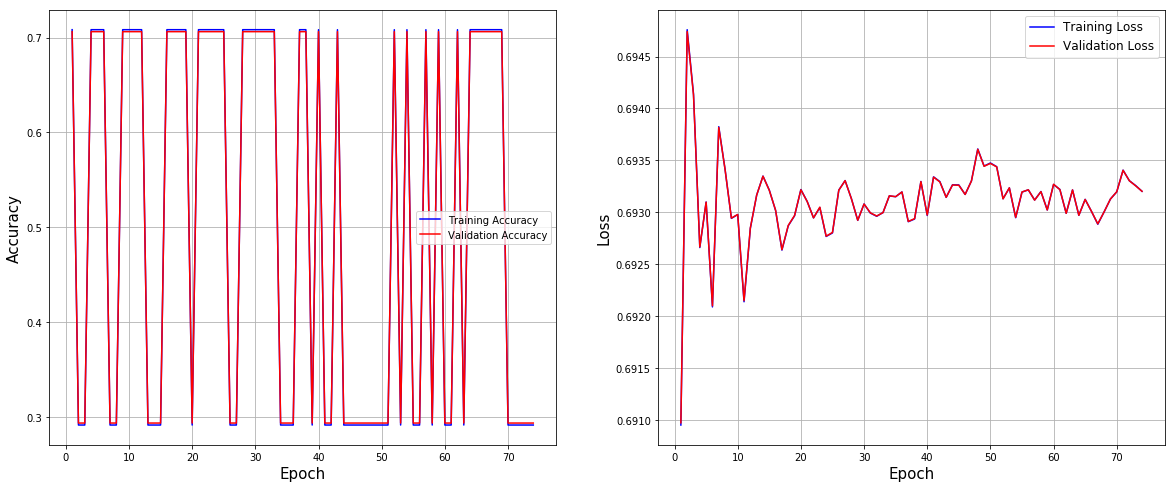

Best Model: B_---_0.0001_16_2007142232_069_t_accr_0.9656_t_loss_0.347245_v_accr_0.9503_v_loss_0.364293.pt

Phase: ---, Learning Rate: 0.001, Batch Size: 16

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 5619
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 2314

Device: GeForce RTX 2080 Ti 

Epoch |###########################------------------------------------------- | 38 / 100

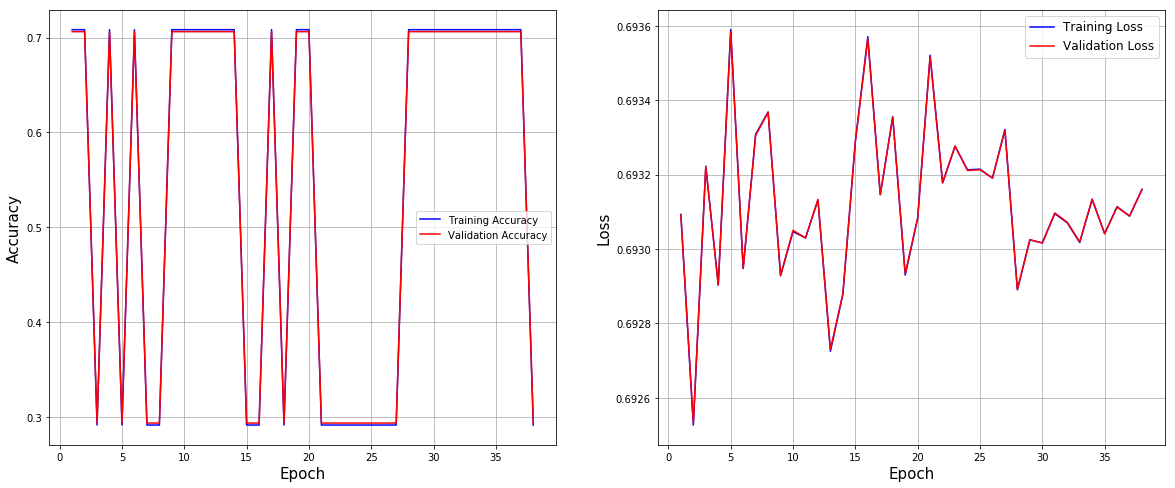

Best Model: B_---_0.0001_16_2007142232_069_t_accr_0.9656_t_loss_0.347245_v_accr_0.9503_v_loss_0.364293.pt

Phase: ---, Learning Rate: 0.001, Batch Size: 8

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 5619
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 2314

Device: GeForce RTX 2080 Ti 

Epoch |##################################------------------------------------ | 49 / 100

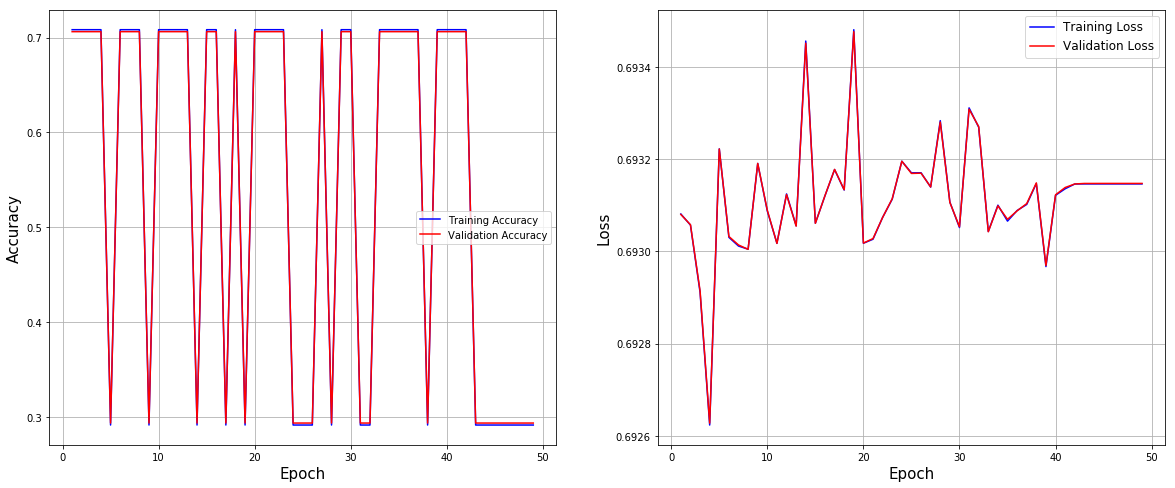

Best Model: B_---_0.0001_16_2007142232_069_t_accr_0.9656_t_loss_0.347245_v_accr_0.9503_v_loss_0.364293.pt
negative - negative | augmented training data: 11238 |(For validation) train x: (5619, 3, 512, 512) valid x: (625, 3, 512, 512)
hemorrhagic - red_spot | augmented training data: 1000 |(For validation) train x: (500, 3, 512, 512) valid x: (56, 3, 512, 512)
hemorrhagic - angioectasia | augmented training data: 32 |(For validation) train x: (16, 3, 512, 512) valid x: (2, 3, 512, 512)
hemorrhagic - active_bleeding | augmented training data: 770 |(For validation) train x: (385, 3, 512, 512) valid x: (43, 3, 512, 512)
depressed - erosion | augmented training data: 1326 |(For validation) train x: (663, 3, 512, 512) valid x: (74, 3, 512, 512)
depressed - ulcer | augmented training data: 1316 |(For validation) train x: (658, 3, 512, 512) valid x: (74, 3, 512, 512)
depressed - stricture | augmented training data: 184 |(For validation) train x: (92, 3, 512, 512) valid x: (11, 3, 512, 512)

Ph

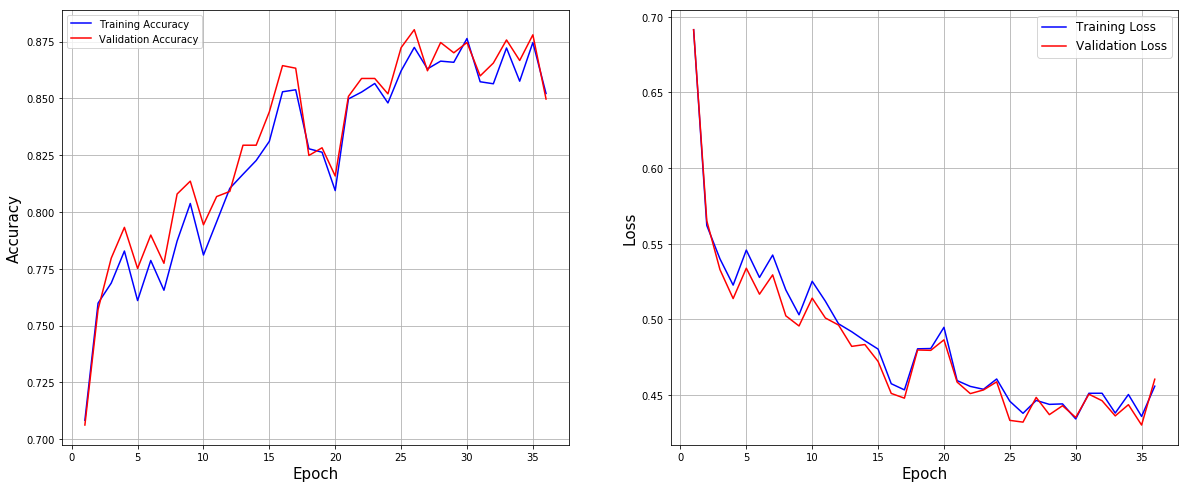

Best Model: B_f--_1e-05_32_2007150249_002_t_accr_0.7599_t_loss_0.562122_v_accr_0.7571_v_loss_0.565189.pt

Phase: f--, Learning Rate: 1e-05, Batch Size: 16

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 11238
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 4628

Device: GeForce RTX 2080 Ti 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 512, 512]             448
            Conv2d-2         [-1, 16, 512, 512]           2,320
         MaxPool2d-3         [-1, 16, 256, 256]               0
            Conv2d-4         [-1, 16, 256, 256]           2,320
            Conv2d-5         [-1, 16, 256, 256]           2,320
         MaxPool2d-6         [-1, 16, 128, 128]               0
            Conv2d-7         [-1, 16, 128, 128]           2,320
            Conv2d-8         [-1, 16, 128, 128]           2,320
         MaxPoo

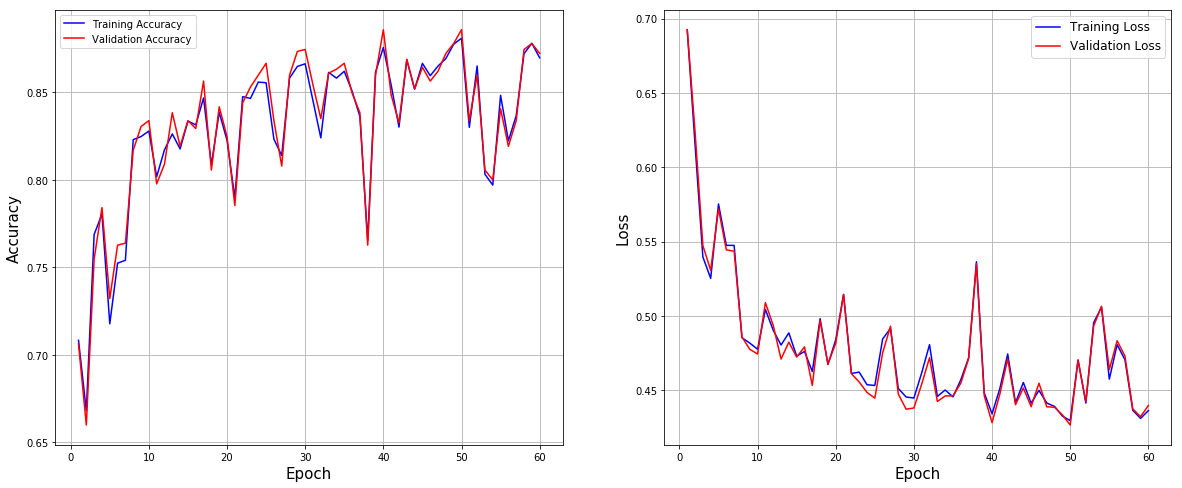

Best Model: B_f--_1e-05_16_2007150415_008_t_accr_0.8230_t_loss_0.485384_v_accr_0.8169_v_loss_0.485967.pt

Phase: f--, Learning Rate: 1e-05, Batch Size: 8

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 11238
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 4628

Device: GeForce RTX 2080 Ti 

Epoch |#############--------------------------------------------------------- | 19 / 100

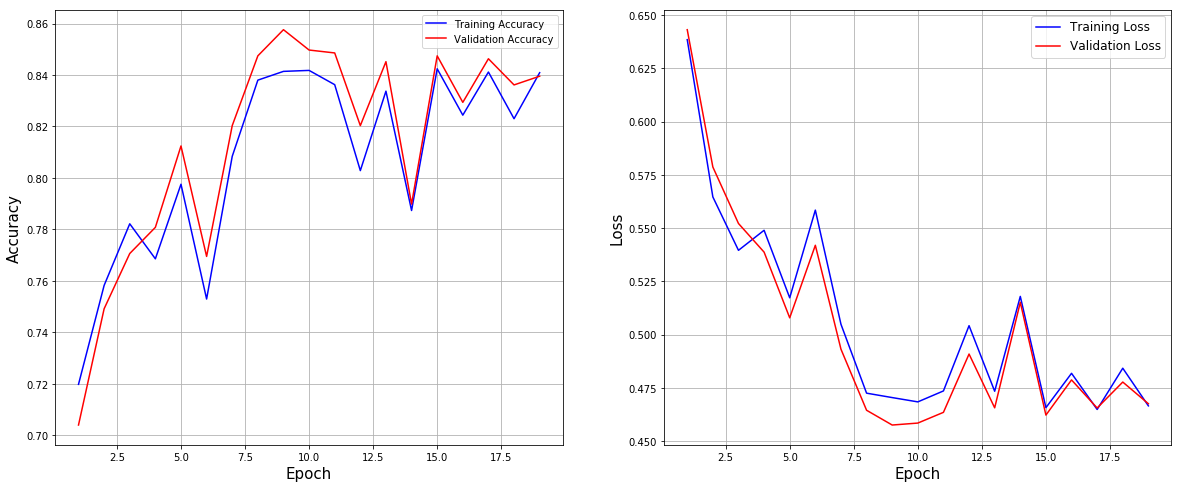

Best Model: B_f--_1e-05_16_2007150415_008_t_accr_0.8230_t_loss_0.485384_v_accr_0.8169_v_loss_0.485967.pt

Phase: f--, Learning Rate: 0.0001, Batch Size: 32

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 11238
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 4628

Device: GeForce RTX 2080 Ti 

Epoch |#############--------------------------------------------------------- | 19 / 100

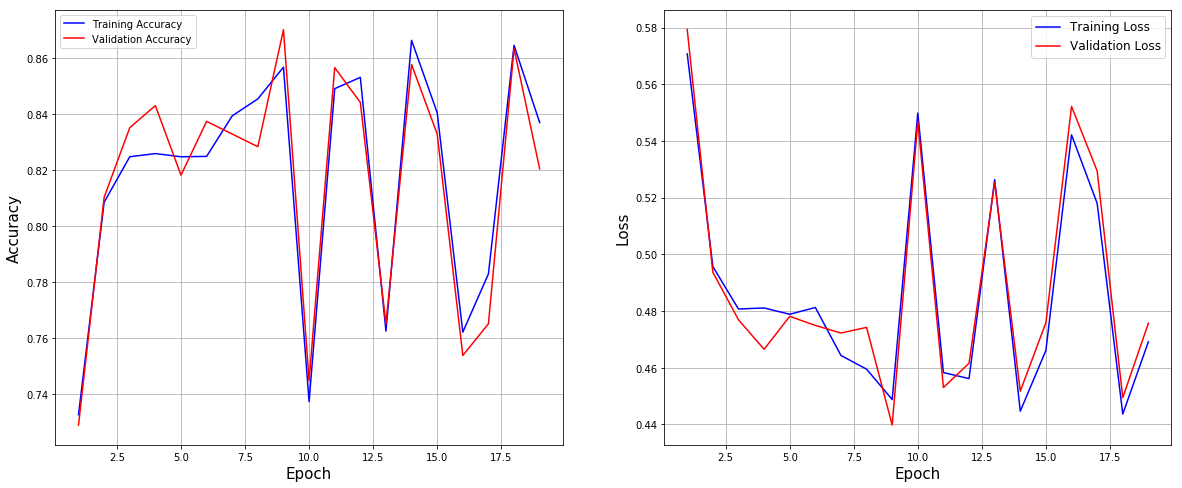

Best Model: B_f--_1e-05_16_2007150415_008_t_accr_0.8230_t_loss_0.485384_v_accr_0.8169_v_loss_0.485967.pt

Phase: f--, Learning Rate: 0.0001, Batch Size: 16

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 11238
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 4628

Device: GeForce RTX 2080 Ti 

Epoch |#############################----------------------------------------- | 42 / 100

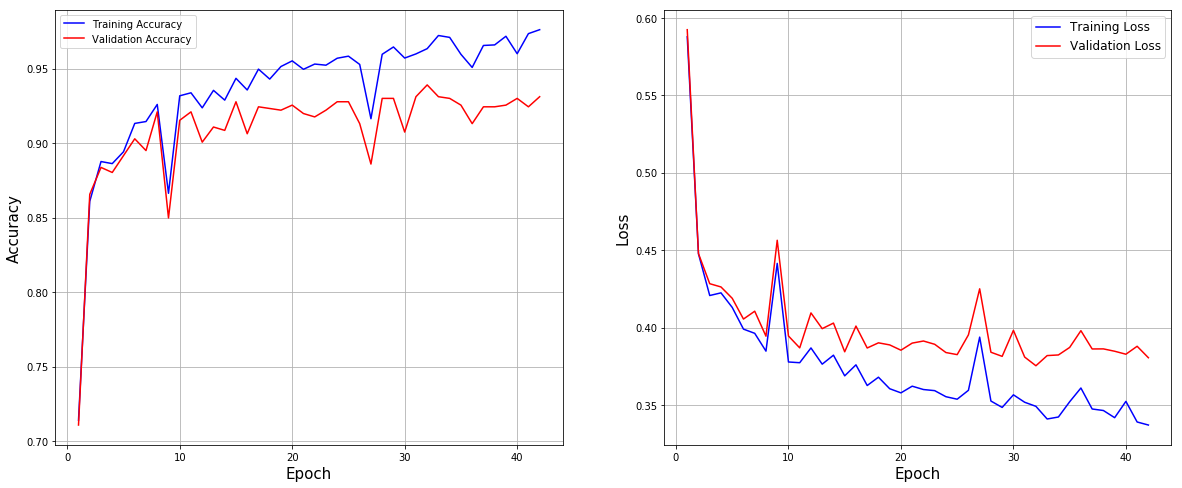

Best Model: B_f--_0.0001_16_2007150831_032_t_accr_0.9633_t_loss_0.349107_v_accr_0.9390_v_loss_0.375322.pt

Phase: f--, Learning Rate: 0.0001, Batch Size: 8

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 11238
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 4628

Device: GeForce RTX 2080 Ti 

Epoch |#################################------------------------------------- | 47 / 100

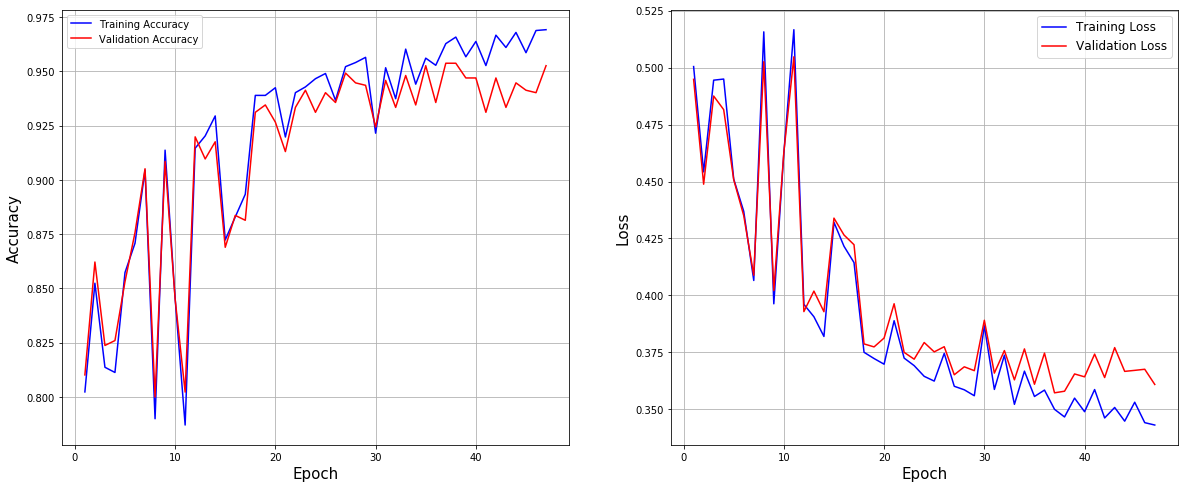

Best Model: B_f--_0.0001_8_2007151017_037_t_accr_0.9627_t_loss_0.350014_v_accr_0.9537_v_loss_0.357257.pt

Phase: f--, Learning Rate: 0.001, Batch Size: 32

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 11238
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 4628

Device: GeForce RTX 2080 Ti 

Epoch |#######--------------------------------------------------------------- | 10 / 100

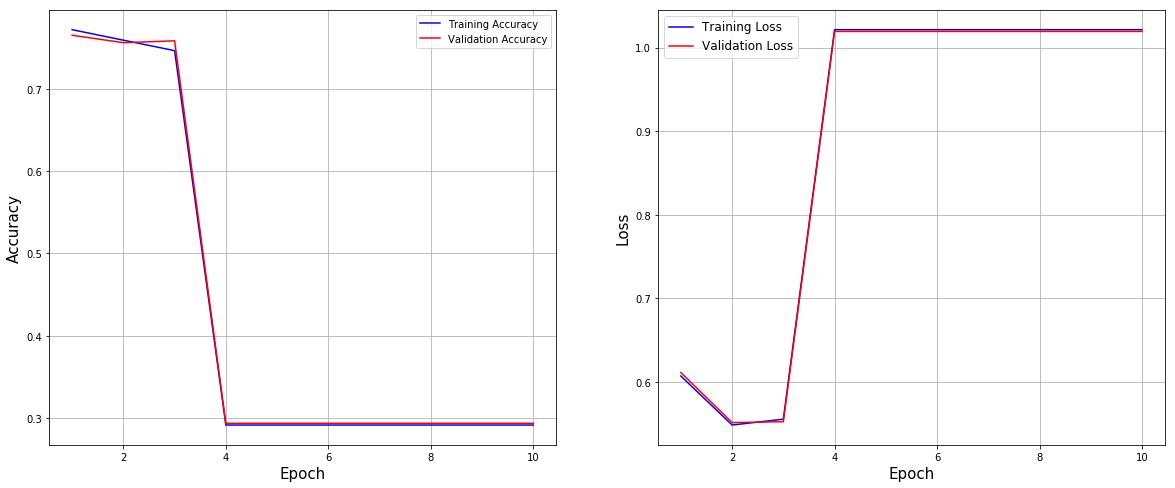

Best Model: B_f--_0.0001_8_2007151017_037_t_accr_0.9627_t_loss_0.350014_v_accr_0.9537_v_loss_0.357257.pt

Phase: f--, Learning Rate: 0.001, Batch Size: 16

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 11238
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 4628

Device: GeForce RTX 2080 Ti 

Epoch |##################################------------------------------------ | 49 / 100

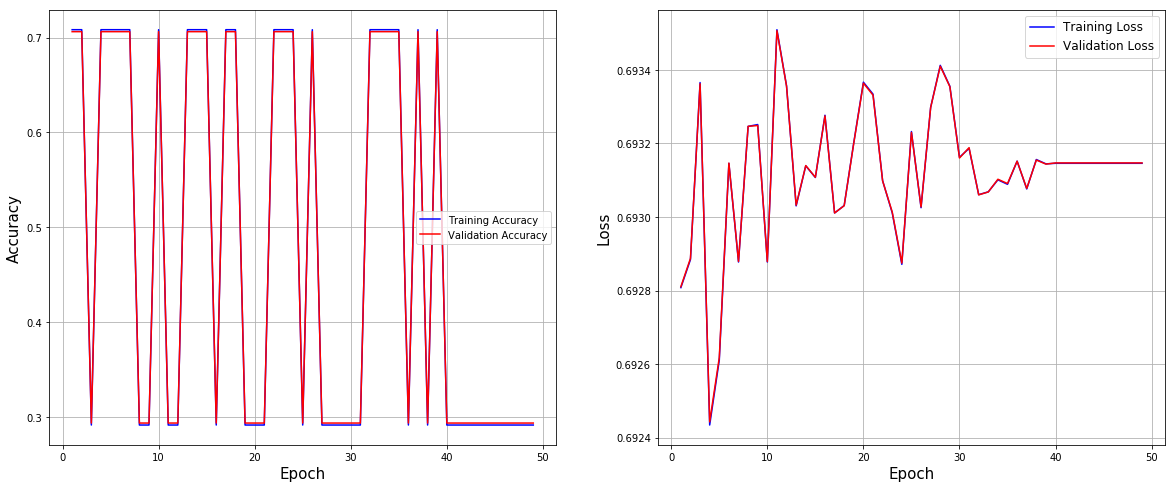

Best Model: B_f--_0.0001_8_2007151017_037_t_accr_0.9627_t_loss_0.350014_v_accr_0.9537_v_loss_0.357257.pt

Phase: f--, Learning Rate: 0.001, Batch Size: 8

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 11238
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 4628

Device: GeForce RTX 2080 Ti 

Epoch |#####################################--------------------------------- | 53 / 100

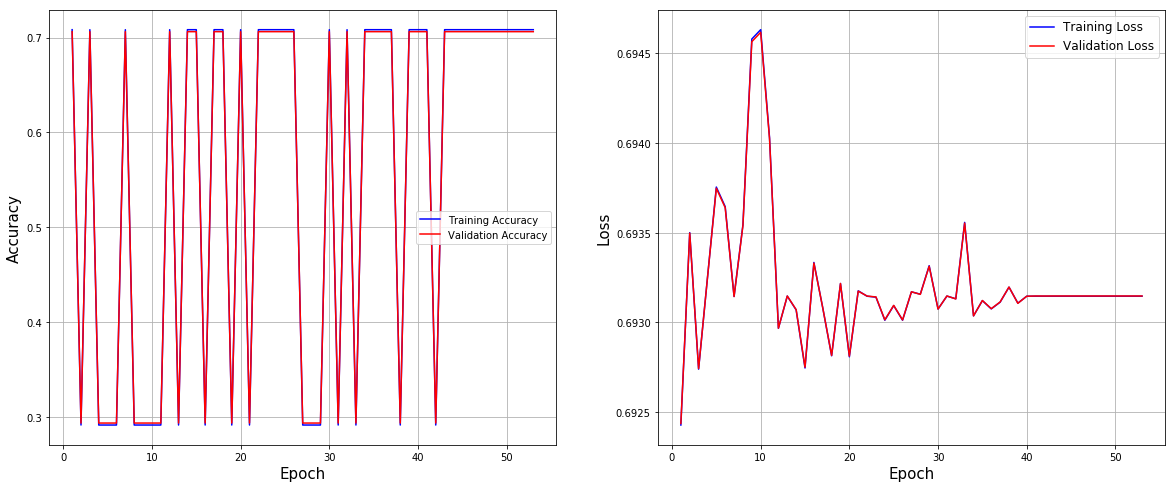

Best Model: B_f--_0.0001_8_2007151017_037_t_accr_0.9627_t_loss_0.350014_v_accr_0.9537_v_loss_0.357257.pt
negative - negative | augmented training data: 22476 |(For validation) train x: (5619, 3, 512, 512) valid x: (625, 3, 512, 512)
hemorrhagic - red_spot | augmented training data: 2000 |(For validation) train x: (500, 3, 512, 512) valid x: (56, 3, 512, 512)
hemorrhagic - angioectasia | augmented training data: 64 |(For validation) train x: (16, 3, 512, 512) valid x: (2, 3, 512, 512)
hemorrhagic - active_bleeding | augmented training data: 1540 |(For validation) train x: (385, 3, 512, 512) valid x: (43, 3, 512, 512)
depressed - erosion | augmented training data: 2652 |(For validation) train x: (663, 3, 512, 512) valid x: (74, 3, 512, 512)
depressed - ulcer | augmented training data: 2632 |(For validation) train x: (658, 3, 512, 512) valid x: (74, 3, 512, 512)
depressed - stricture | augmented training data: 368 |(For validation) train x: (92, 3, 512, 512) valid x: (11, 3, 512, 512)

Ph

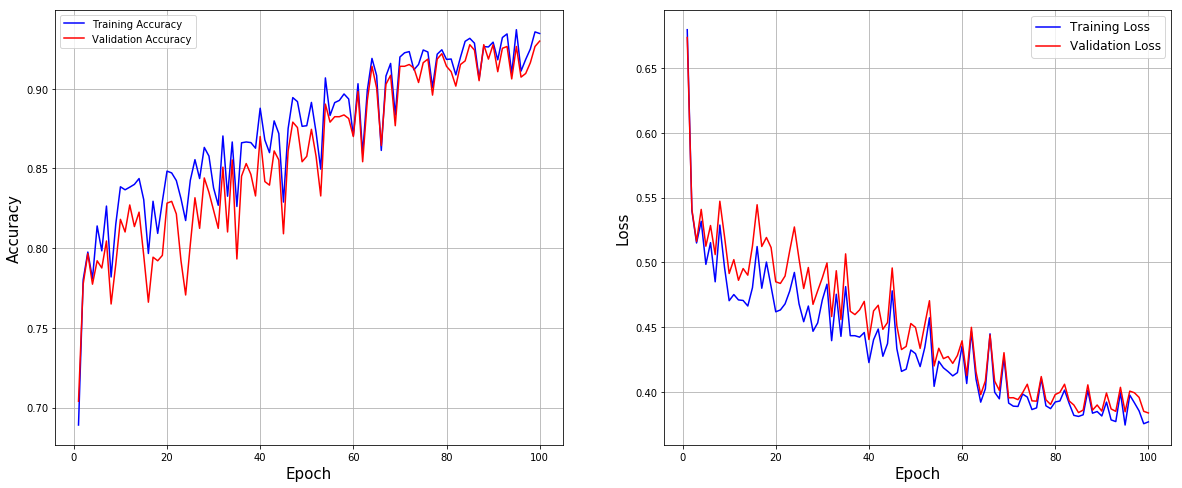

Best Model: B_-r-_1e-05_32_2007152120_100_t_accr_0.9347_t_loss_0.376917_v_accr_0.9299_v_loss_0.383795.pt

Phase: -r-, Learning Rate: 1e-05, Batch Size: 16

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 22476
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 9256

Device: GeForce RTX 2080 Ti 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 512, 512]             448
            Conv2d-2         [-1, 16, 512, 512]           2,320
         MaxPool2d-3         [-1, 16, 256, 256]               0
            Conv2d-4         [-1, 16, 256, 256]           2,320
            Conv2d-5         [-1, 16, 256, 256]           2,320
         MaxPool2d-6         [-1, 16, 128, 128]               0
            Conv2d-7         [-1, 16, 128, 128]           2,320
            Conv2d-8         [-1, 16, 128, 128]           2,320
         MaxPoo

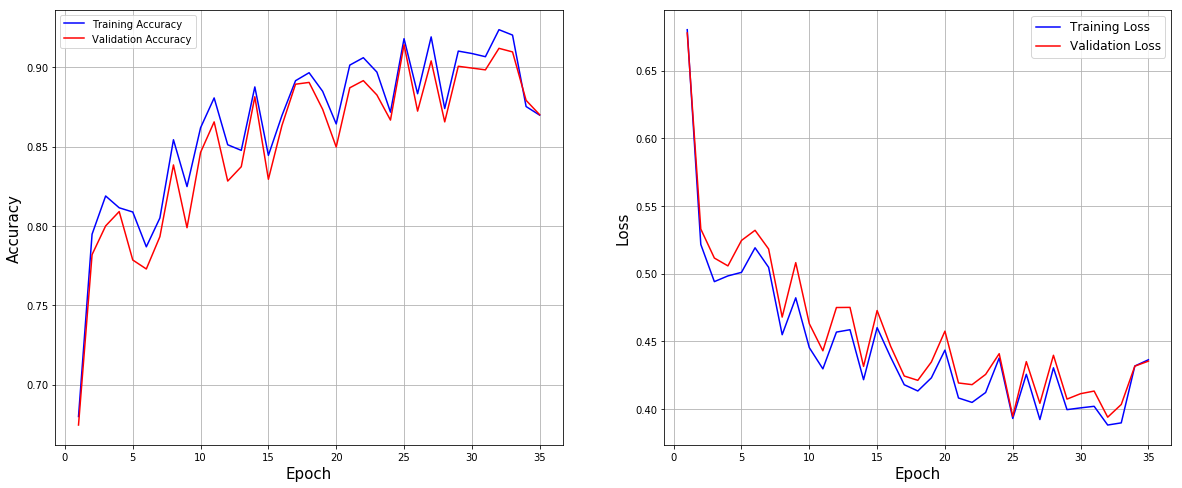

Best Model: B_-r-_1e-05_32_2007152120_100_t_accr_0.9347_t_loss_0.376917_v_accr_0.9299_v_loss_0.383795.pt

Phase: -r-, Learning Rate: 1e-05, Batch Size: 8

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 22476
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 9256

Device: GeForce RTX 2080 Ti 

Epoch |##################################------------------------------------ | 48 / 100

In [ ]:
phase_a = [[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 1, 1]]
phase_a_label = ['---', 'f--', '-r-', '--b', 'fr-', 'frb']

for i, name in zip(phase_a, phase_a_label):
        
    sm160 = sm160_dataset(phase = 'train', data = 'sm_x160_v2', pre_a = i, pre_b = False, ext_name = False)
    train_paths, train_X, valid_X = sm160_load()
    
    LRs = [0.00001, 0.0001, 0.001]
    BSs = [32, 16, 8]
    
    Params = list(product(*[LRs, BSs]))
    
    n = 0; model_spec = 1
    
    for lr, bs in Params:
        
        print('')
        print('Phase: {}, Learning Rate: {}, Batch Size: {}\n'.format(name, lr, bs))  
        
        CT = CNN_Training(n_ch = 3, input_h = 512, input_w = 512, n_cls = 2, lr = lr, n_batch_per_cls = bs, 
                          n_epoch = 100, n_patient = 10, model_name = 'B_{}'.format(name), GPU_idx = 3)

        CT.Run(train_paths, train_X, valid_X, model_spec = model_spec, verbose = 2, model_dir = './model/')   
        
        n += 1
        if n != 1: model_spec = 0

negative - negative | augmented training data: 899040 |(For validation) train x: (5619, 3, 512, 512) valid x: (625, 3, 512, 512)
hemorrhagic - red_spot | augmented training data: 80000 |(For validation) train x: (500, 3, 512, 512) valid x: (56, 3, 512, 512)
hemorrhagic - angioectasia | augmented training data: 2560 |(For validation) train x: (16, 3, 512, 512) valid x: (2, 3, 512, 512)
hemorrhagic - active_bleeding | augmented training data: 61600 |(For validation) train x: (385, 3, 512, 512) valid x: (43, 3, 512, 512)
depressed - erosion | augmented training data: 106080 |(For validation) train x: (663, 3, 512, 512) valid x: (74, 3, 512, 512)
depressed - ulcer | augmented training data: 105280 |(For validation) train x: (658, 3, 512, 512) valid x: (74, 3, 512, 512)
depressed - stricture | augmented training data: 14720 |(For validation) train x: (92, 3, 512, 512) valid x: (11, 3, 512, 512)

Phase: ---_sv, Learning Rate: 0.0001, Batch Size: 32

0 train: (5619, 3, 512, 512) valid: (625, 

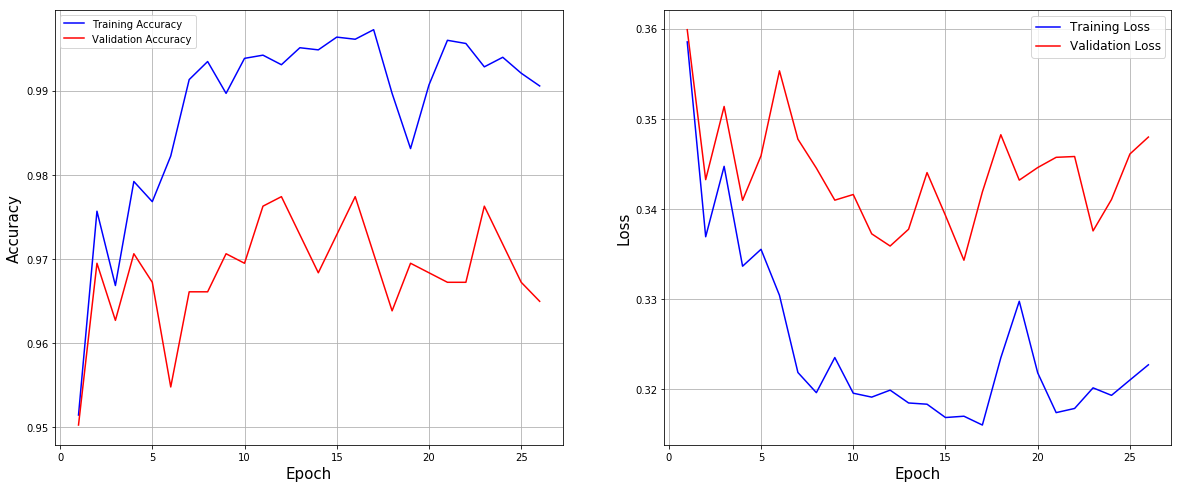

Best Model: B_---_sv_0.0001_32_2007290554_016_t_accr_0.9961_t_loss_0.317016_v_accr_0.9774_v_loss_0.334313.pt

Phase: ---_sv, Learning Rate: 0.0001, Batch Size: 16

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 899040
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 370240

Device: GeForce RTX 2080 Ti 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 512, 512]             448
            Conv2d-2         [-1, 16, 512, 512]           2,320
         MaxPool2d-3         [-1, 16, 256, 256]               0
            Conv2d-4         [-1, 16, 256, 256]           2,320
            Conv2d-5         [-1, 16, 256, 256]           2,320
         MaxPool2d-6         [-1, 16, 128, 128]               0
            Conv2d-7         [-1, 16, 128, 128]           2,320
            Conv2d-8         [-1, 16, 128, 128]           2,320
    

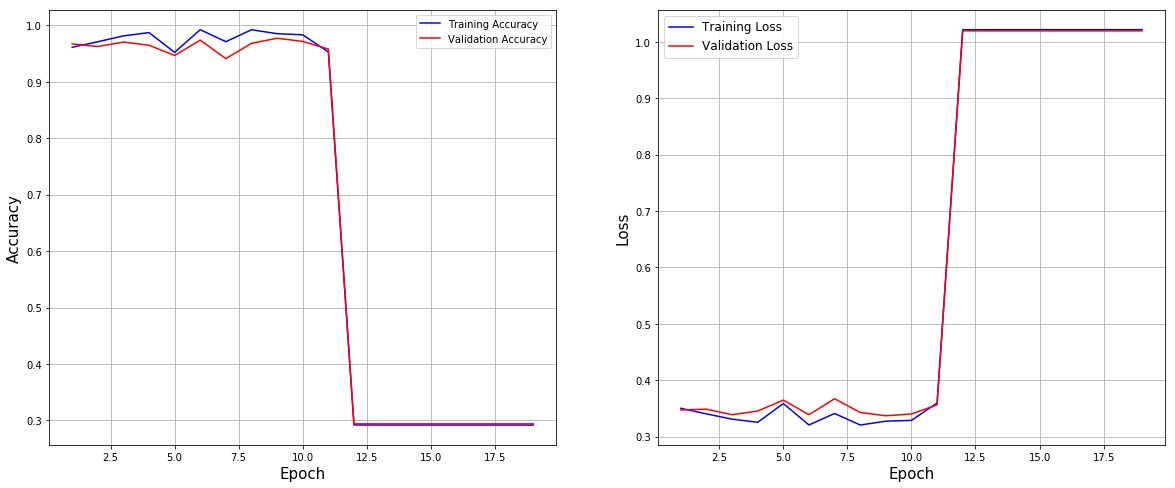

Best Model: B_---_sv_0.0001_32_2007290554_016_t_accr_0.9961_t_loss_0.317016_v_accr_0.9774_v_loss_0.334313.pt

Phase: ---_sv, Learning Rate: 0.0001, Batch Size: 8

0 train: (5619, 3, 512, 512) valid: (625, 3, 512, 512)
0 augmented train 899040
1 train: (2314, 3, 512, 512) valid: (260, 3, 512, 512)
1 augmented train 370240

Device: GeForce RTX 2080 Ti 

Epoch |#########------------------------------------------------------------- | 13 / 100

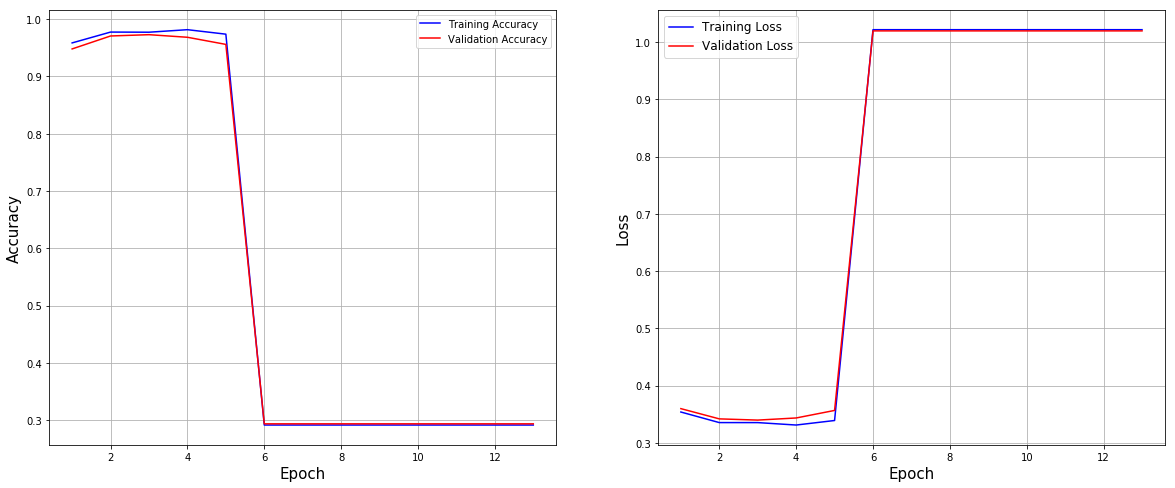

Best Model: B_---_sv_0.0001_32_2007290554_016_t_accr_0.9961_t_loss_0.317016_v_accr_0.9774_v_loss_0.334313.pt


In [7]:
phase_a = [[0, 0, 0]]
phase_a_label = ['---_sv']

for i, name in zip(phase_a, phase_a_label):
        
    sm160 = sm160_dataset(phase = 'train', data = 'sm_x160_v2', pre_a = i, pre_b = True, ext_name = False)
    train_paths, train_X, valid_X = sm160_load()
    
    LRs = [0.0001]
    BSs = [32, 16, 8]
    
    Params = list(product(*[LRs, BSs]))
    
    n = 0; model_spec = 1
    
    for lr, bs in Params:
        
        print('')
        print('Phase: {}, Learning Rate: {}, Batch Size: {}\n'.format(name, lr, bs))  
        
        CT = CNN_Training(n_ch = 3, input_h = 512, input_w = 512, n_cls = 2, lr = lr, n_batch_per_cls = bs, 
                          n_epoch = 100, n_patient = 10, model_name = 'B_{}'.format(name), GPU_idx = 3)

        CT.Run(train_paths, train_X, valid_X, model_spec = model_spec, verbose = 2, model_dir = './model/')   
        
        n += 1
        if n != 1: model_spec = 0